In [16]:
import math
from collections import defaultdict
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from nnperm_utils import error_barrier_linspace_sample, error_barrier_from_losses


def load_values(model, save_dir: Path, error_barrier_midpoint=False):
    values = defaultdict(list)
    for f in save_dir.glob("errors_2_1_*"):
        outputs = torch.load(f, map_location=torch.device("cpu"))
        _, _, _, level, epoch = f.stem.split("_")
        model_1_loss = np.mean(outputs["original_barriers"][0])
        values["model"].append(model)
        values["level"].append(level)
        values["epoch"].append(epoch)
        values["perm_type"].append("loss")
        values["barrier"].append(model_1_loss)
        for k, v in outputs.items():
            if k.endswith("_barriers"):
                perm_type = k[:-len("_barriers")]
                barrier = error_barrier_from_losses(v, reduction='mean')
                values["model"].append(model)
                values["level"].append(level)
                values["epoch"].append(epoch)
                values["perm_type"].append(perm_type)
                if error_barrier_midpoint:
                    values["barrier"].append(barrier[5])
                else:
                    values["barrier"].append(np.max(barrier))
    return pd.DataFrame(values, columns=["model", "level", "epoch", "perm_type", "barrier"])

def plot_barriers_comparison(df, plot_pruning=False):
    plt.figure(figsize=(16, 10))
    linestyles = ["solid", "dotted", "dashed", "dashdot"]
    cmap = plt.get_cmap("Set1")
    models = df["model"].unique()
    perm_types = set(df["perm_type"])
    if plot_pruning:
        levels = set(df["level"])
        if "pretrain" in levels:
            levels.remove("pretrain")
    else:
        levels = set(df["epoch"])
        if "160" in levels:
            levels.remove("160")
    levels = sorted([int(x) for x in levels])
    for w, model in enumerate(models):  # line width and opacity
        for c, perm in enumerate(list(perm_types)[1:2]):  # color and line style
            y = []
            for level in levels:  # x-axis
                data = df.loc[df["model"] == model]
                data = data.loc[data["perm_type"] == perm]
                col = data["level" if plot_pruning else "epoch"]
                y.append(list(data.loc[col == str(level)]["barrier"])[0])
            plt.plot(levels, y,
                c=cmap(c),
                linestyle=linestyles[c % len(linestyles)],
                linewidth=1 + w*1.5,
                alpha=(1 - w / len(models)),
                label=model,
            )
    plt.legend()

def plot_from_dir(dir_root, names, models, error_barrier_midpoint=False):
    data = pd.DataFrame()
    for name, model_path in zip(names, models):
        model_data = load_values(name, Path(dir_root + model_path), error_barrier_midpoint)
        data = pd.concat([data, model_data])
    # return data
    plot_barriers_comparison(data, False)
    # plot_barriers_comparison(data, True)

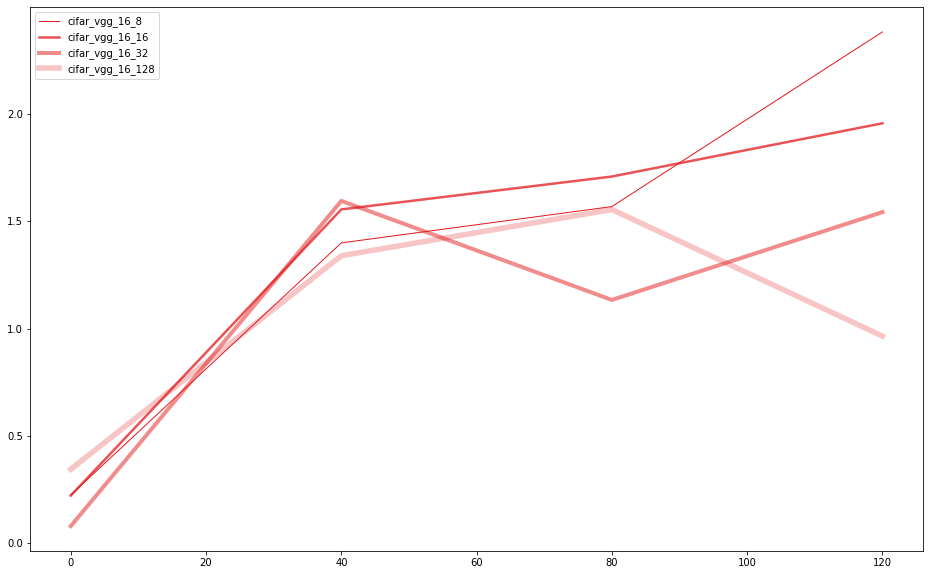

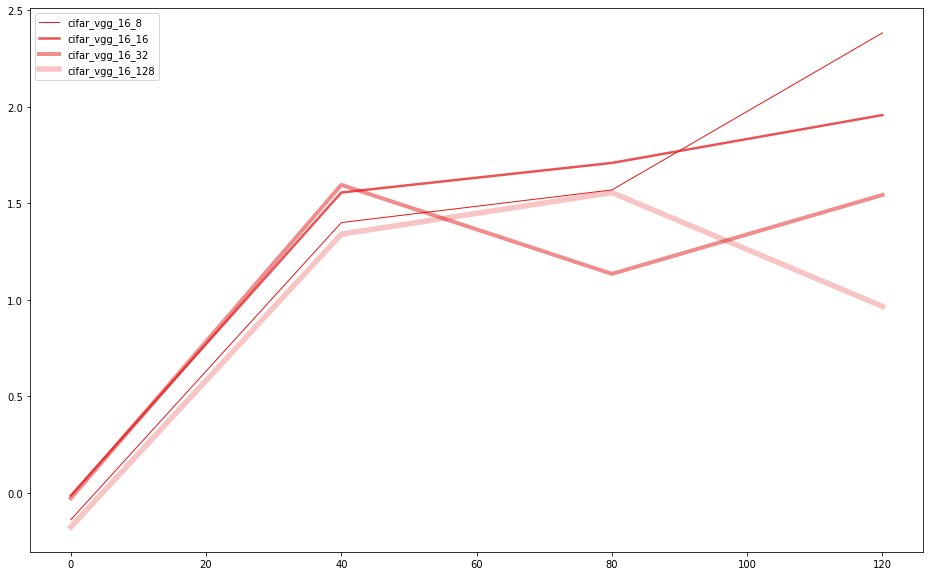

In [17]:
model_name_to_dir = {
    "cifar_vgg_16_8": "lottery_3d9c91d3d4133cfcdcb2006da1507cbb",
    "cifar_vgg_16_16": "lottery_2915b34d8b29a209ffee2288466cf5f6",
    "cifar_vgg_16_32": "lottery_c855d7c25ffef997a89799dc08931e82",
    "cifar_vgg_16_128": "lottery_8d561a7b273e4d6b2705ba6d627a69bd",
    "cifar_vgg_16_256": "lottery_a309ac4ab15380928661e70ca8b054a1",
}

out_dir = "outputs/rebasin/exp_1e/False_MSELoss()_1.0_"
names, models = list(zip(*[(k, v) for k, v in model_name_to_dir.items()]))
data = plot_from_dir(out_dir, names, models)
data = plot_from_dir(out_dir, names, models, True)

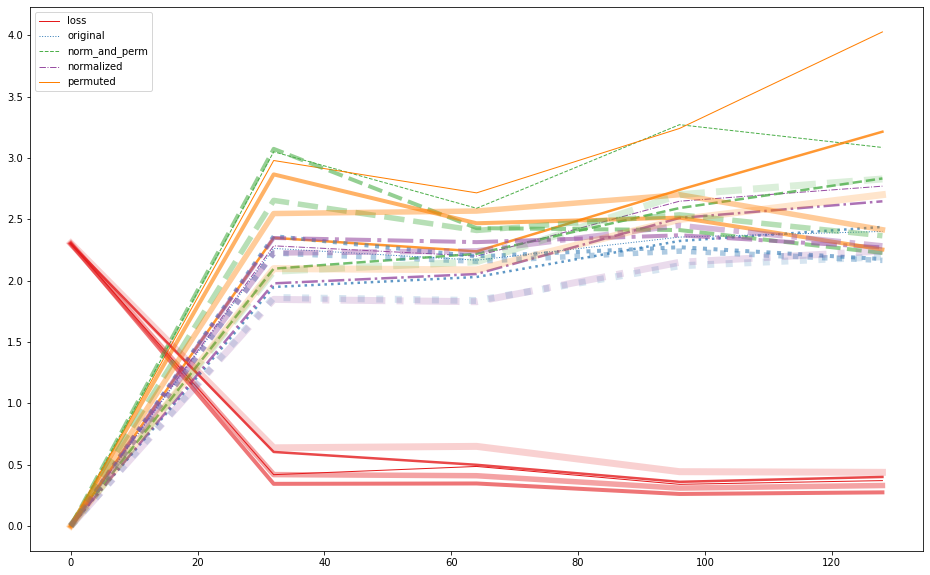

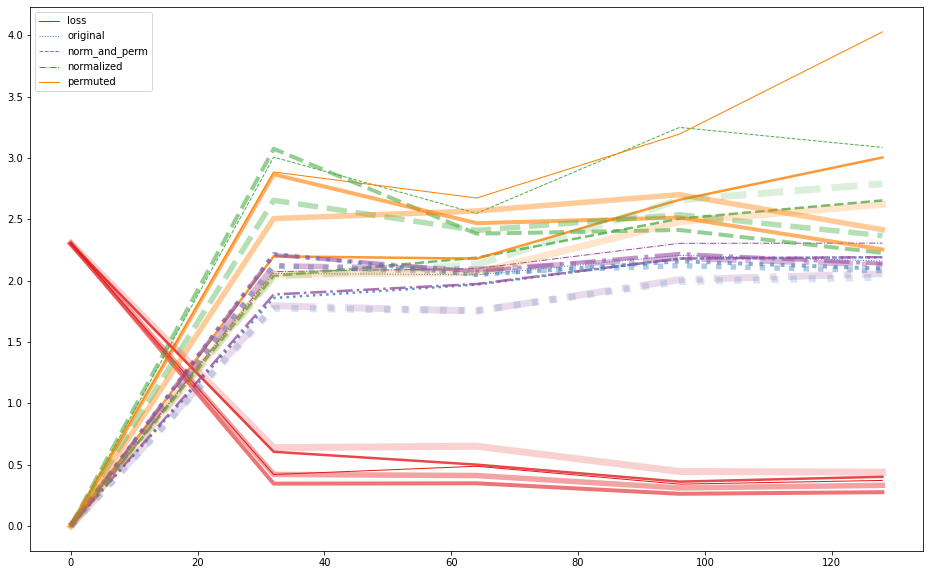

In [33]:
model_name_to_dir = {
    # "vgg_256": "lottery_405df0e1af1fd13b750c0dbb6c92d3a5",
    "vgg_128": "lottery_4d7656b80d72437f584722d51aedd0fc",
    "vgg_64": "lottery_06e3ceea2dae7621529556ef969cf803",
    "vgg_32": "lottery_c4249732c49350ed79fec7f29d9f6c7e",
    "vgg_16": "lottery_b62907fe0a5dc7dc6bcfa22dea75fe21",
    "vgg_8": "lottery_bd85f4b553eb07d3e751c7d9bd03b3bc",
}

out_dir = "outputs/rebasin/exp_1b/False_MSELoss()_1.0_"
names, models = list(zip(*[(k, v) for k, v in model_name_to_dir.items()]))
data = plot_from_dir(out_dir, names, models)
data = plot_from_dir(out_dir, names, models, True)


In [66]:
data

,model,level,epoch,perm_type,barrier
0,vgg_128,pretrain,0,loss,2.302776
1,vgg_128,pretrain,0,original,0.000011
2,vgg_128,pretrain,0,normalized,0.000011
3,vgg_128,pretrain,0,permuted,0.000011
4,vgg_128,pretrain,0,norm_and_perm,0.000011
5,vgg_128,pretrain,32,loss,0.344557
6,vgg_128,pretrain,32,original,2.364250
7,vgg_128,pretrain,32,normalized,2.349031
8,vgg_128,pretrain,32,permuted,2.638891
9,vgg_128,pretrain,32,norm_and_perm,3.102437
